# <font color='Red'>CUSTOMER CHURN PREDICTION</font>

## (i) VARIABLE IDENTIFICATION

First of all we wiil import necessary libraries and read the dataset that we're working with.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [47]:
df = pd.read_csv('churn_prediction.csv')

Let's take a look at the data set and its properties

In [48]:
#size of the dataset

df.shape

(28382, 21)

In [49]:
# datatypes present in the dataset

df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [50]:
# first 5 rows of dataset

df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [51]:
# let's check the null values present in the dataset

df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

Now we will seggregate all the columns based ont heir current datatypes and classify them as categorical or continuous variables according to their nature

### Integer DataTypes

In [52]:
# listing out all the datatypes that are integers

df.dtypes[df.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

Summary:

* **Customer_id** are a unique number assigned to customers. It can be stored as **Integer**.

* **branch_code** again represents different branches, therefore it should be **convereted to category**.

* **Age** and **Vintage** are also numbers and hence we are okay with them as integers.

* **customer_networth_category** is supposed to be an ordinal category, should be **converted to category**.

* **churn** : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This needs to be **converted to category** datatype.

In [53]:
# Changing integer datatypes to category

df['customer_nw_category'] = df['customer_nw_category'].astype('category')
df['branch_code'] = df['branch_code'].astype('category')
df['churn'] = df['churn'].astype('category')

# listing out integer datatypes after updation

df.dtypes[df.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

### Float DataType

In [54]:
# listing out float dtatypes

df.dtypes[df.dtypes == 'float64']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

Summary:

* **dependents** should be **changed to integer**. 
* **city** is a categorical variable so should be **changed to category**.

In [55]:
# Changing the float datatype to category

df['dependents'] = df['dependents'].astype('Int64')
df['city'] = df['city'].astype('category')

# listing the float datatypes after updation

df.dtypes[df.dtypes == 'float64']

current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

### Object DataType

In [56]:
df[['gender', 'occupation', 'last_transaction']].head(5)

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03


Summary:
* **gender** and **occupation** are categorical variables so they should be **changed to category**
* **last_transaction** is a date-time variable so it should be **changed to datetime**

In [57]:
# changing object to category

df['gender'] = df['gender'].astype('category')
df['occupation'] = df['occupation'].astype('category')

# changing to datetime

df['last_transaction'] = pd.to_datetime(df['last_transaction'])

# listing out datatypes again after updation
df.dtypes

customer_id                                int64
vintage                                    int64
age                                        int64
gender                                  category
dependents                                 Int64
occupation                              category
city                                    category
customer_nw_category                    category
branch_code                             category
current_balance                          float64
previous_month_end_balance               float64
average_monthly_balance_prevQ            float64
average_monthly_balance_prevQ2           float64
current_month_credit                     float64
previous_month_credit                    float64
current_month_debit                      float64
previous_month_debit                     float64
current_month_balance                    float64
previous_month_balance                   float64
churn                                   category
last_transaction    

### Datetime DataType

We need more granular information from datetype variables so we will extract this information by **breaking down the last_transaction** column into:
* **day of year**
* **month**
* **week of year**
* **day of week**

In [58]:
# Extracting new columns from datetime datatype

df['doy_ls_tran'] = df['last_transaction'].dt.dayofyear
df['moy_ls_tran'] = df['last_transaction'].dt.month
df['woy_ls_tran'] = df['last_transaction'].dt.weekofyear
df['dow_ls_tran'] = df['last_transaction'].dt.dayofweek

# Checking out columns from dataframe after all the updates

df.dtypes

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18044\3886745890.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['woy_ls_tran'] = df['last_transaction'].dt.weekofyear


customer_id                                int64
vintage                                    int64
age                                        int64
gender                                  category
dependents                                 Int64
occupation                              category
city                                    category
customer_nw_category                    category
branch_code                             category
current_balance                          float64
previous_month_end_balance               float64
average_monthly_balance_prevQ            float64
average_monthly_balance_prevQ2           float64
current_month_credit                     float64
previous_month_credit                    float64
current_month_debit                      float64
previous_month_debit                     float64
current_month_balance                    float64
previous_month_balance                   float64
churn                                   category
last_transaction    

Let's have a look at the DataFrame again 

In [59]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,doy_ls_tran,moy_ls_tran,woy_ls_tran,dow_ls_tran
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,1458.71,1458.71,0,2019-05-21,141.0,5.0,21.0,1.0
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,5486.27,100.56,6496.78,8787.61,0,2019-11-01,305.0,11.0,44.0,4.0
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,6046.73,259.23,5006.28,5070.14,0,NaT,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,<NA>,self_employed,1020.0,2,582,2291.91,...,0.47,2143.33,2291.91,1669.79,1,2019-08-06,218.0,8.0,32.0,1.0
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,588.62,1538.06,1157.15,1677.16,1,2019-11-03,307.0,11.0,44.0,6.0


## (ii) UNIVARIATE ANALYSIS: Numerical Variables

let's identify all the numerical variables

In [60]:
# listing all the numerical variables

df.select_dtypes(include = ['Int64', 'int64', 'float64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
moy_ls_tran                       float64
woy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [61]:
# seggregating the variables into groups

customer_details = ['vintage', 'age']
current_month = ['current_balance', 'current_month_credit', 'current_month_debit', 'current_month_balance']
previous_month = ['previous_month_end_balance', 'previous_month_credit', 'previous_month_debit', 'previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran', 'moy_ls_tran', 'woy_ls_tran', 'dow_ls_tran']

In [62]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    
# calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(x=data[i], fill=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### Customer Information

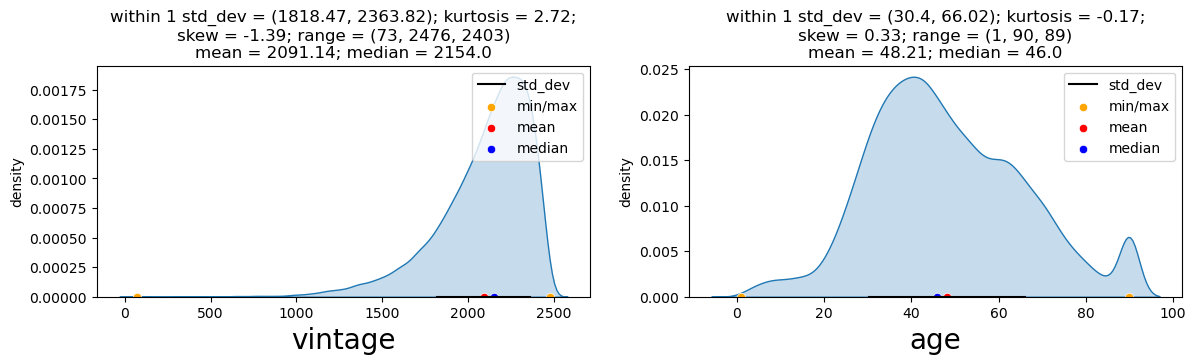

In [63]:
UVA_numeric(df, customer_details)

### Current Month

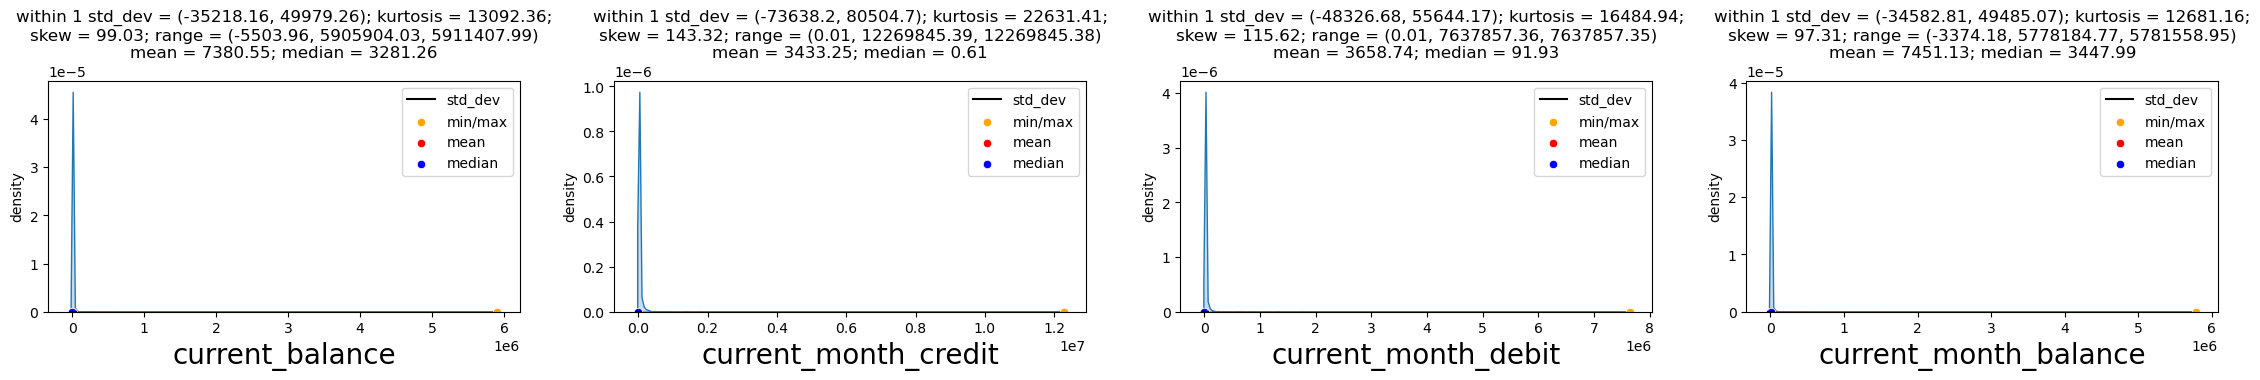

In [64]:
UVA_numeric(df, current_month)

### Previous Month

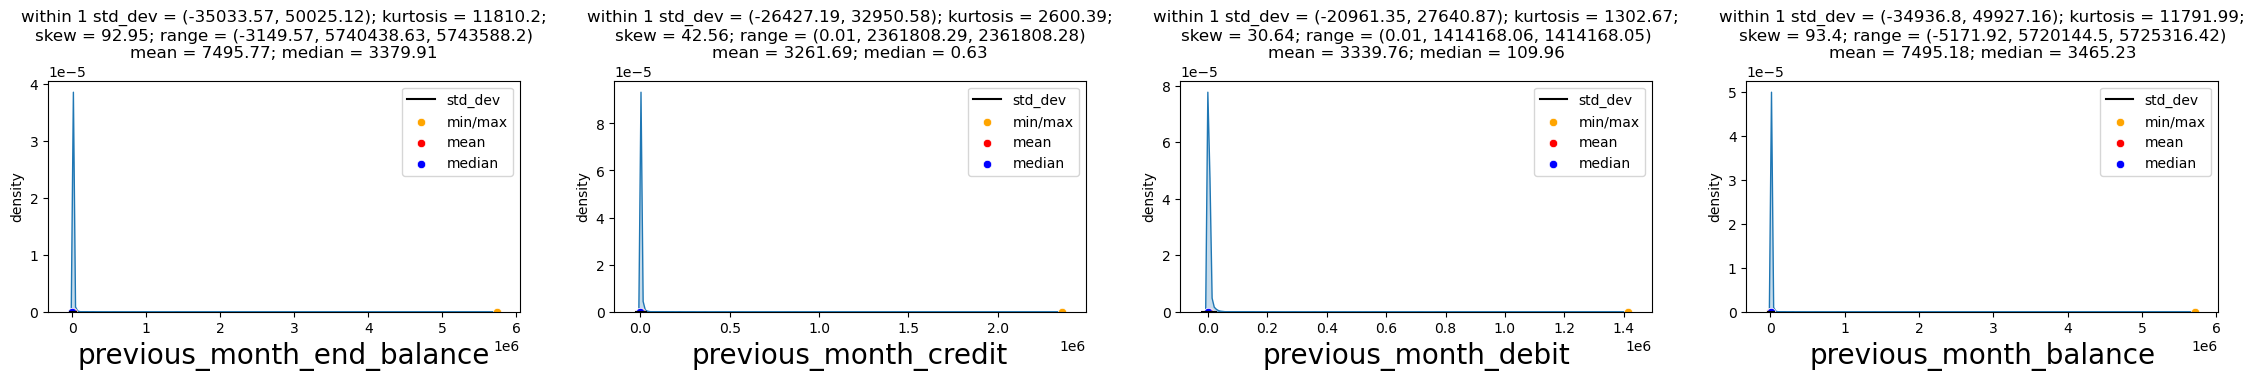

In [65]:
UVA_numeric(df, previous_month)

### Previous Quarter

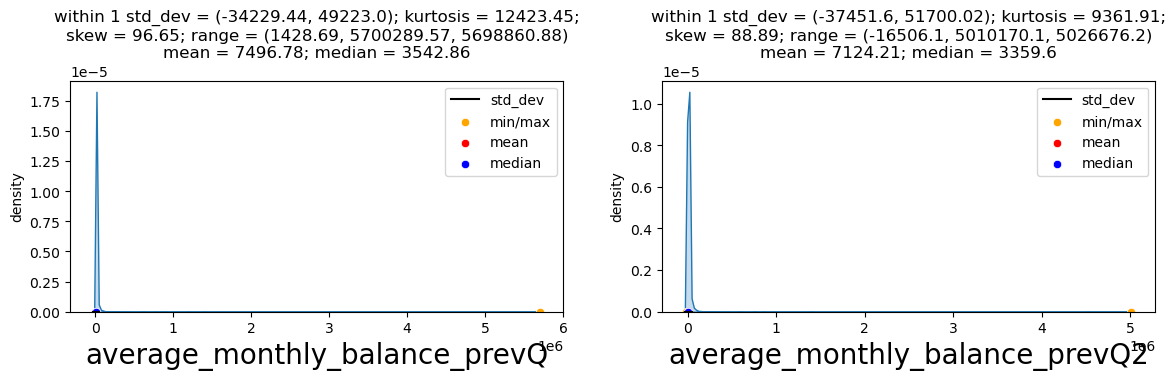

In [66]:
UVA_numeric(df, previous_quarters)

### Transaction Date

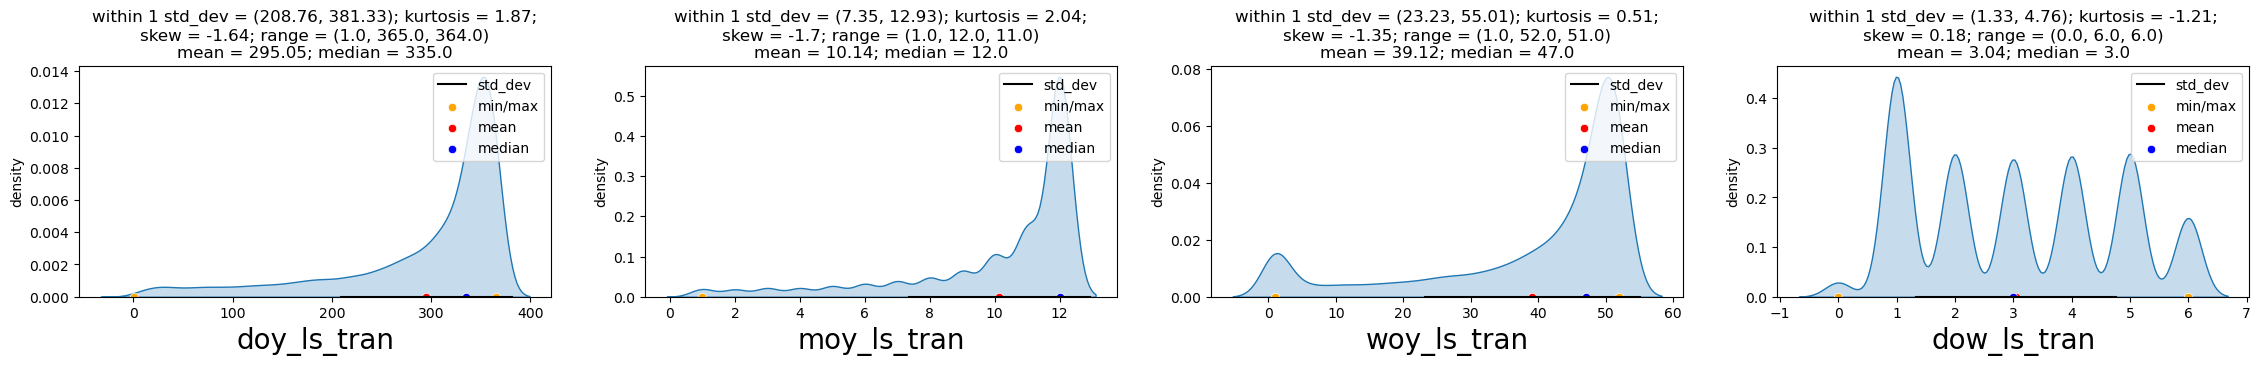

In [67]:
UVA_numeric(df, transaction_date)

## (iii) UNIVARIATE ANALYSIS: Categorical Variables

In [68]:
df.select_dtypes(include = ['category']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [69]:
customer_info = ['gender', 'occupation', 'customer_nw_category']
account_info = ['city', 'branch_code']
churn_outcome = ['churn']

In [70]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(x = norm_count.index, y = norm_count, order = norm_count.index)
    plt.ylabel('fraction/percent', fontsize = 20)
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

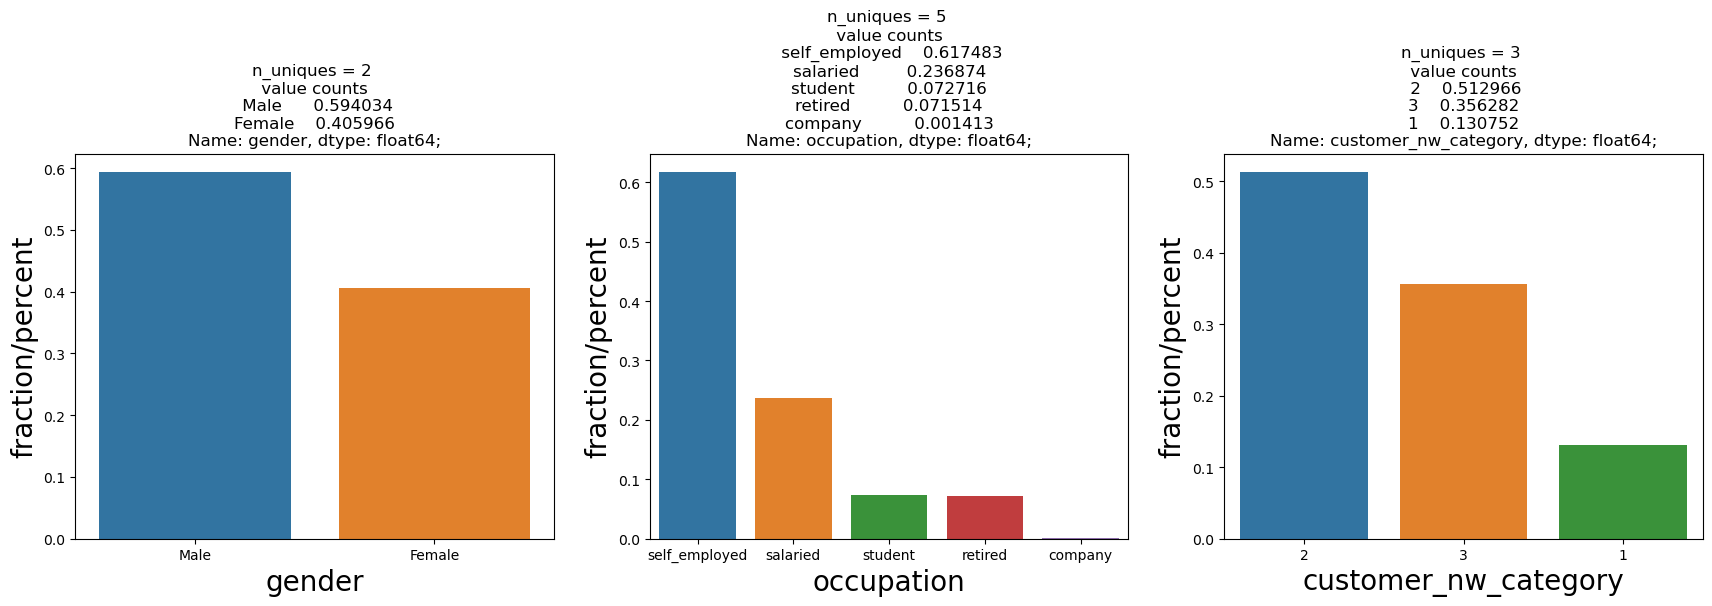

In [71]:
UVA_category(df, customer_info)

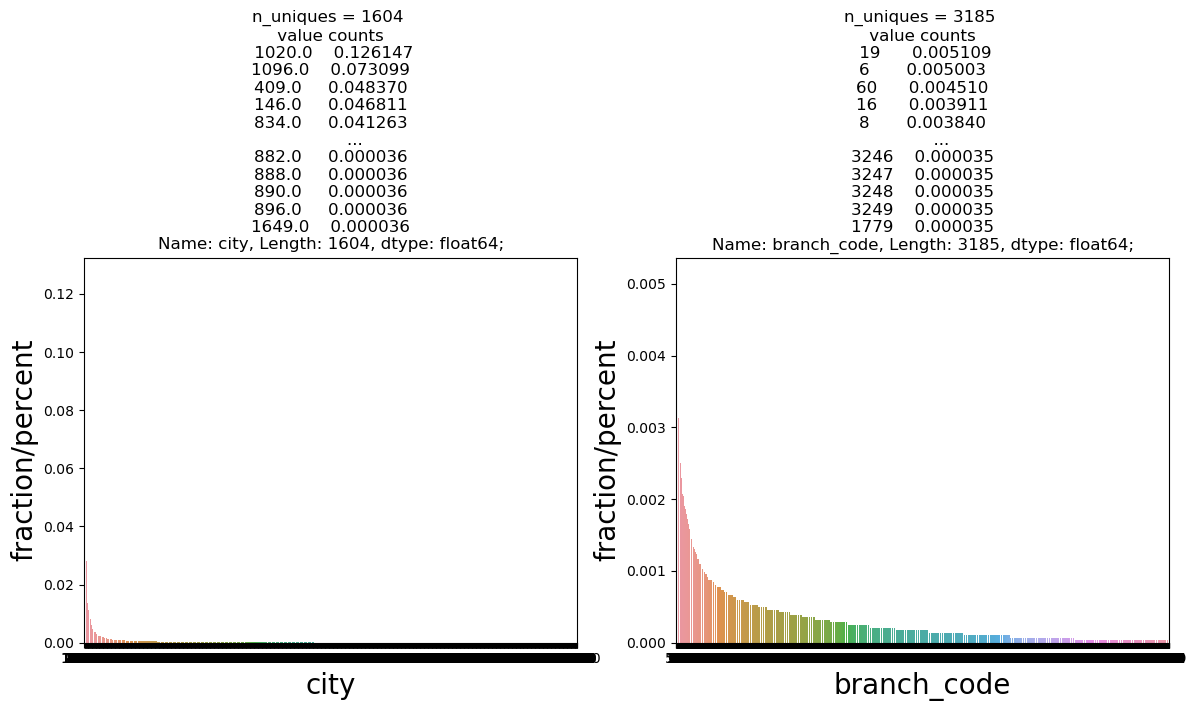

In [72]:
UVA_category(df, account_info)

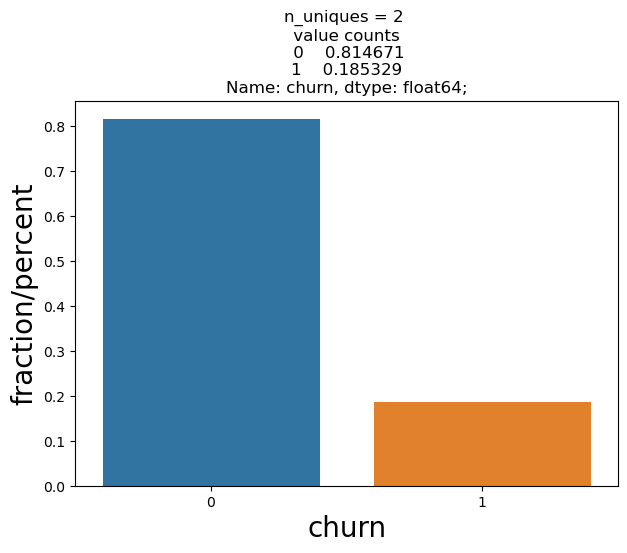

In [73]:
UVA_category(df, churn_outcome)

## UNIVARIATE ANALYSIS: Outliers

In [74]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True


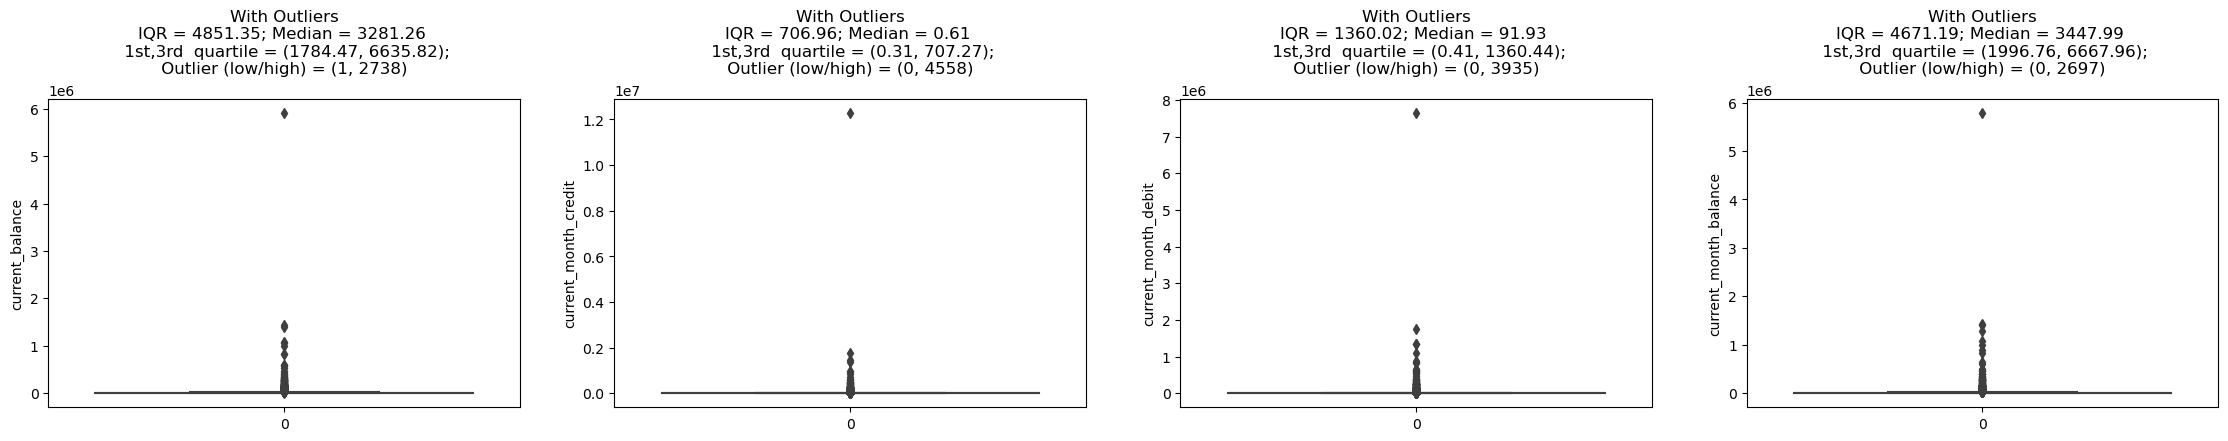

In [75]:
UVA_outlier(df, current_month)

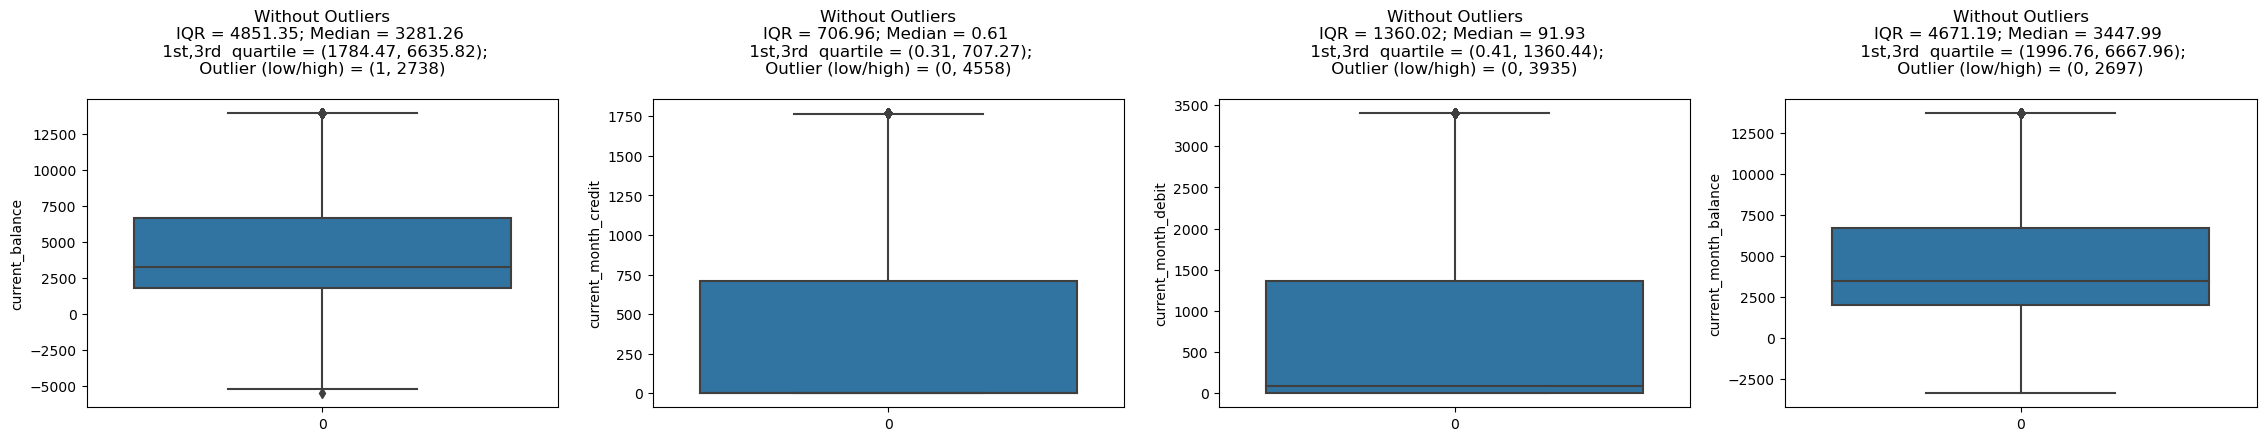

In [76]:
UVA_outlier(df, current_month, include_outlier = False)

True
True
True
True


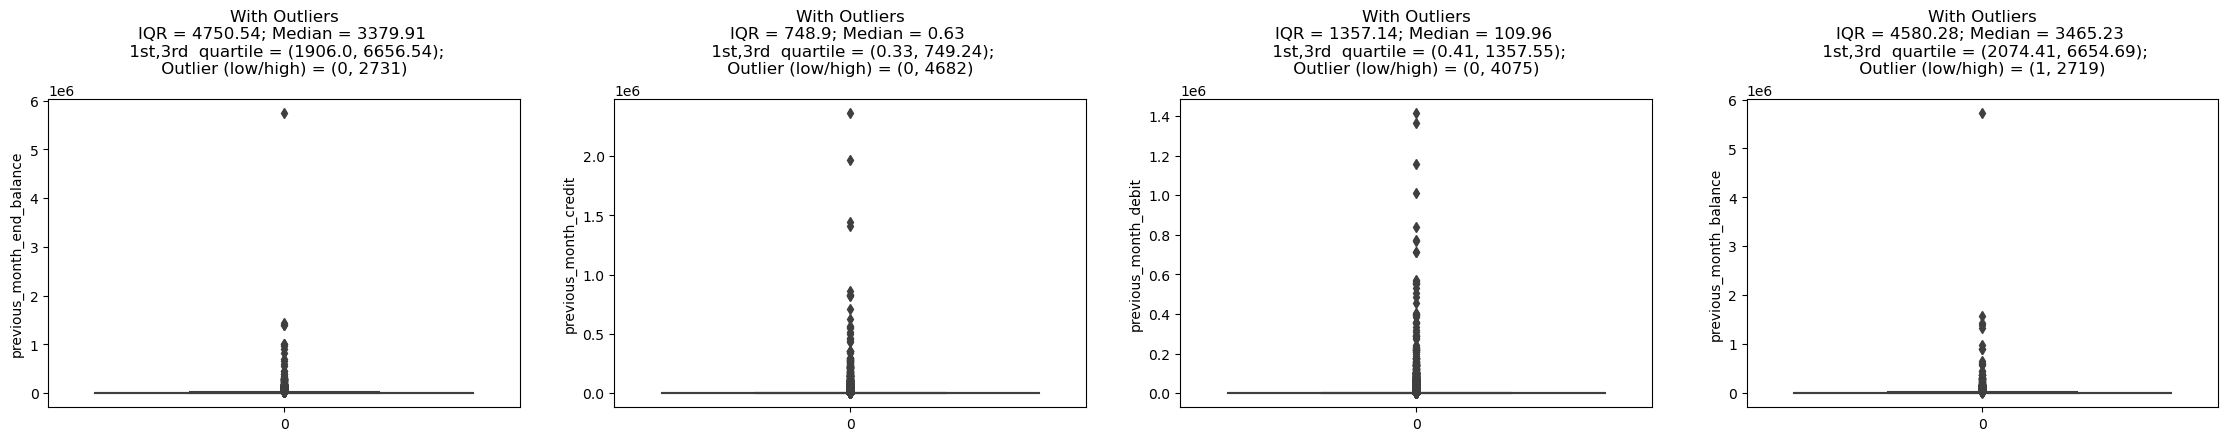

In [77]:
UVA_outlier(df, previous_month)

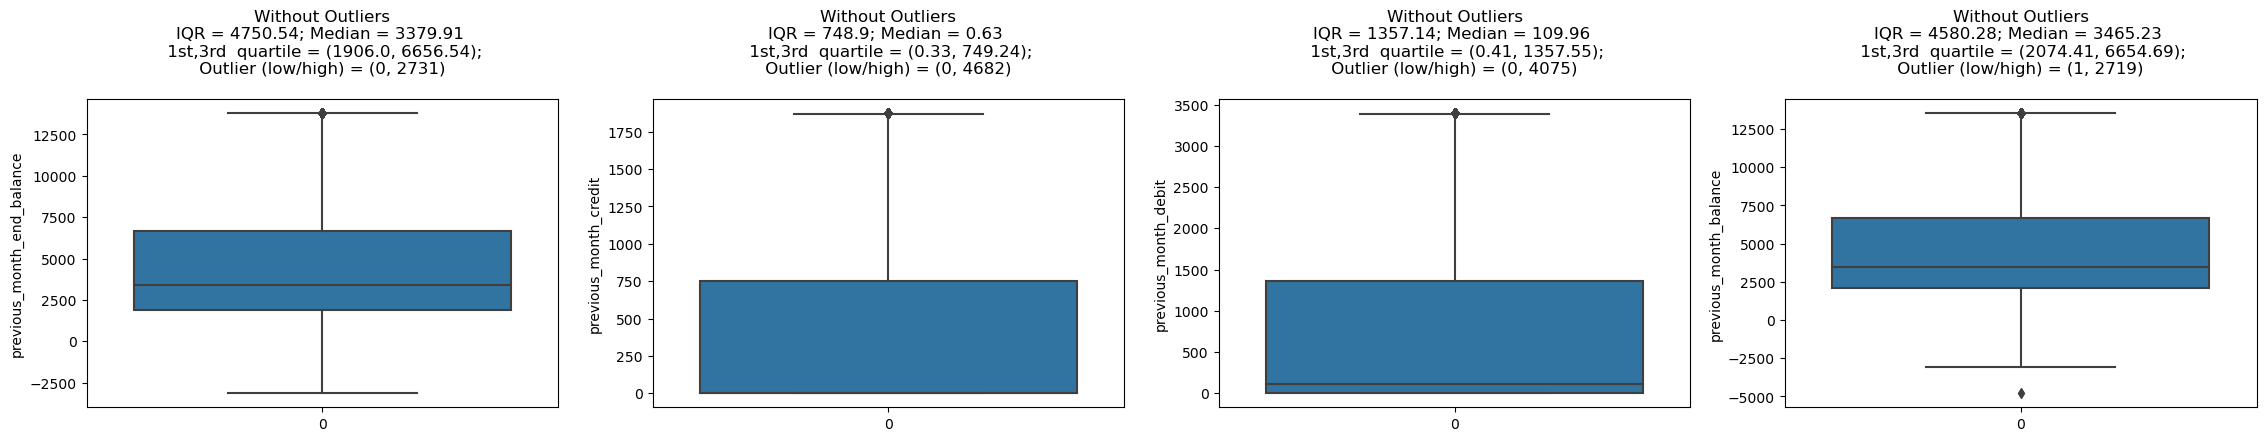

In [78]:
UVA_outlier(df, previous_month, include_outlier = False)

True
True


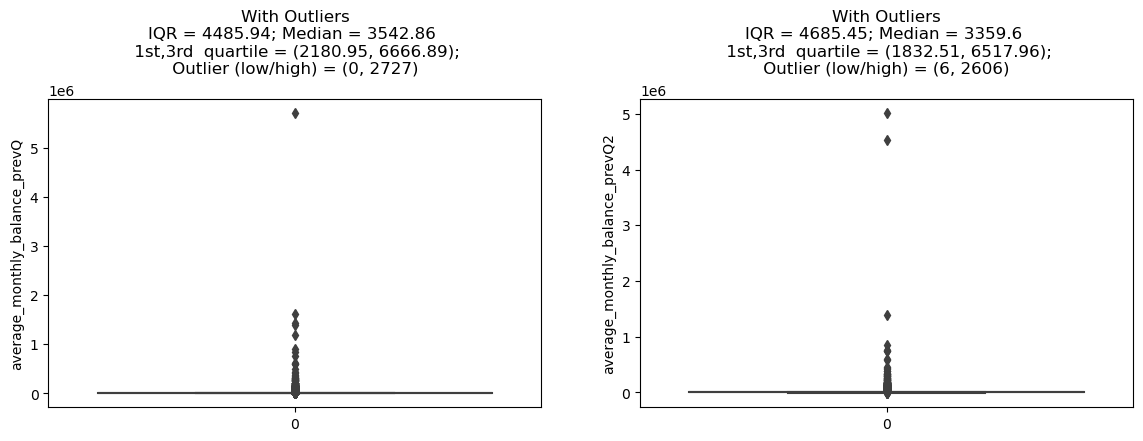

In [79]:
UVA_outlier(df, previous_quarters)

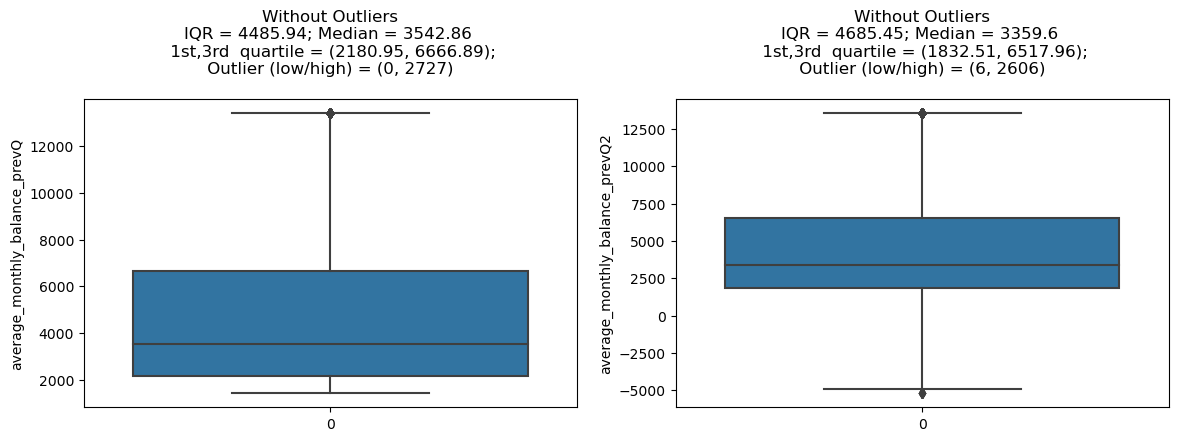

In [80]:
UVA_outlier(df, previous_quarters, include_outlier = False)

## (iv) BI-VARIATE ANALYSIS: Continuous-Continuous

In [81]:
numerical = df.select_dtypes(include = ['Int64', 'int64', 'float64'])
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
moy_ls_tran                       float64
woy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

### Correlation Table

In [82]:
correlation= numerical.dropna().corr()
correlation

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,doy_ls_tran,moy_ls_tran,woy_ls_tran,dow_ls_tran
customer_id,1.000000,-0.011288,0.001397,-0.009737,0.014989,0.012414,0.011372,0.008060,0.004223,-0.004819,0.004870,-0.005906,0.012085,0.011025,-0.006114,-0.005374,0.011344,0.009665
vintage,-0.011288,1.000000,0.003170,0.005109,-0.007223,-0.008001,-0.010858,-0.003824,-0.004821,-0.000410,-0.004899,-0.007777,-0.008703,-0.010439,-0.000680,-0.001359,-0.010040,-0.009683
age,0.001397,0.003170,1.000000,-0.003809,0.058925,0.062775,0.070903,0.081361,0.023921,0.027678,0.025366,0.027717,0.063120,0.067712,0.010754,0.011970,0.000501,-0.020895
dependents,-0.009737,0.005109,-0.003809,1.000000,-0.004554,-0.000826,0.000121,0.002584,0.002188,0.022772,0.006784,0.029073,-0.001859,0.000241,0.079740,0.077978,0.034460,-0.001702
current_balance,0.014989,-0.007223,0.058925,-0.004554,1.000000,0.809257,0.857204,0.584156,0.053329,0.101495,0.075149,0.151771,0.940234,0.812295,0.035242,0.033127,-0.008980,-0.000315
previous_month_end_balance,0.012414,-0.008001,0.062775,-0.000826,0.809257,1.000000,0.908053,0.661439,0.051080,0.195149,0.100379,0.192376,0.910206,0.912269,0.024130,0.023485,0.000946,0.002033
average_monthly_balance_prevQ,0.011372,-0.010858,0.070903,0.000121,0.857204,0.908053,1.000000,0.731953,0.051294,0.138967,0.091491,0.187226,0.920943,0.983797,0.021103,0.020949,-0.000577,0.000647
average_monthly_balance_prevQ2,0.008060,-0.003824,0.081361,0.002584,0.584156,0.661439,0.731953,1.000000,0.085542,0.127557,0.098455,0.162203,0.642531,0.701780,0.010306,0.009123,-0.012720,-0.002463
current_month_credit,0.004223,-0.004821,0.023921,0.002188,0.053329,0.051080,0.051294,0.085542,1.000000,0.165102,0.941455,0.116125,0.055339,0.055020,0.031828,0.030267,0.008664,0.000752
previous_month_credit,-0.004819,-0.000410,0.027678,0.022772,0.101495,0.195149,0.138967,0.127557,0.165102,1.000000,0.160198,0.749628,0.141613,0.178147,0.070141,0.066691,0.016762,-0.006657


### HEATMAP for Correlation Tables (Pearson, Kendall, Spearman)

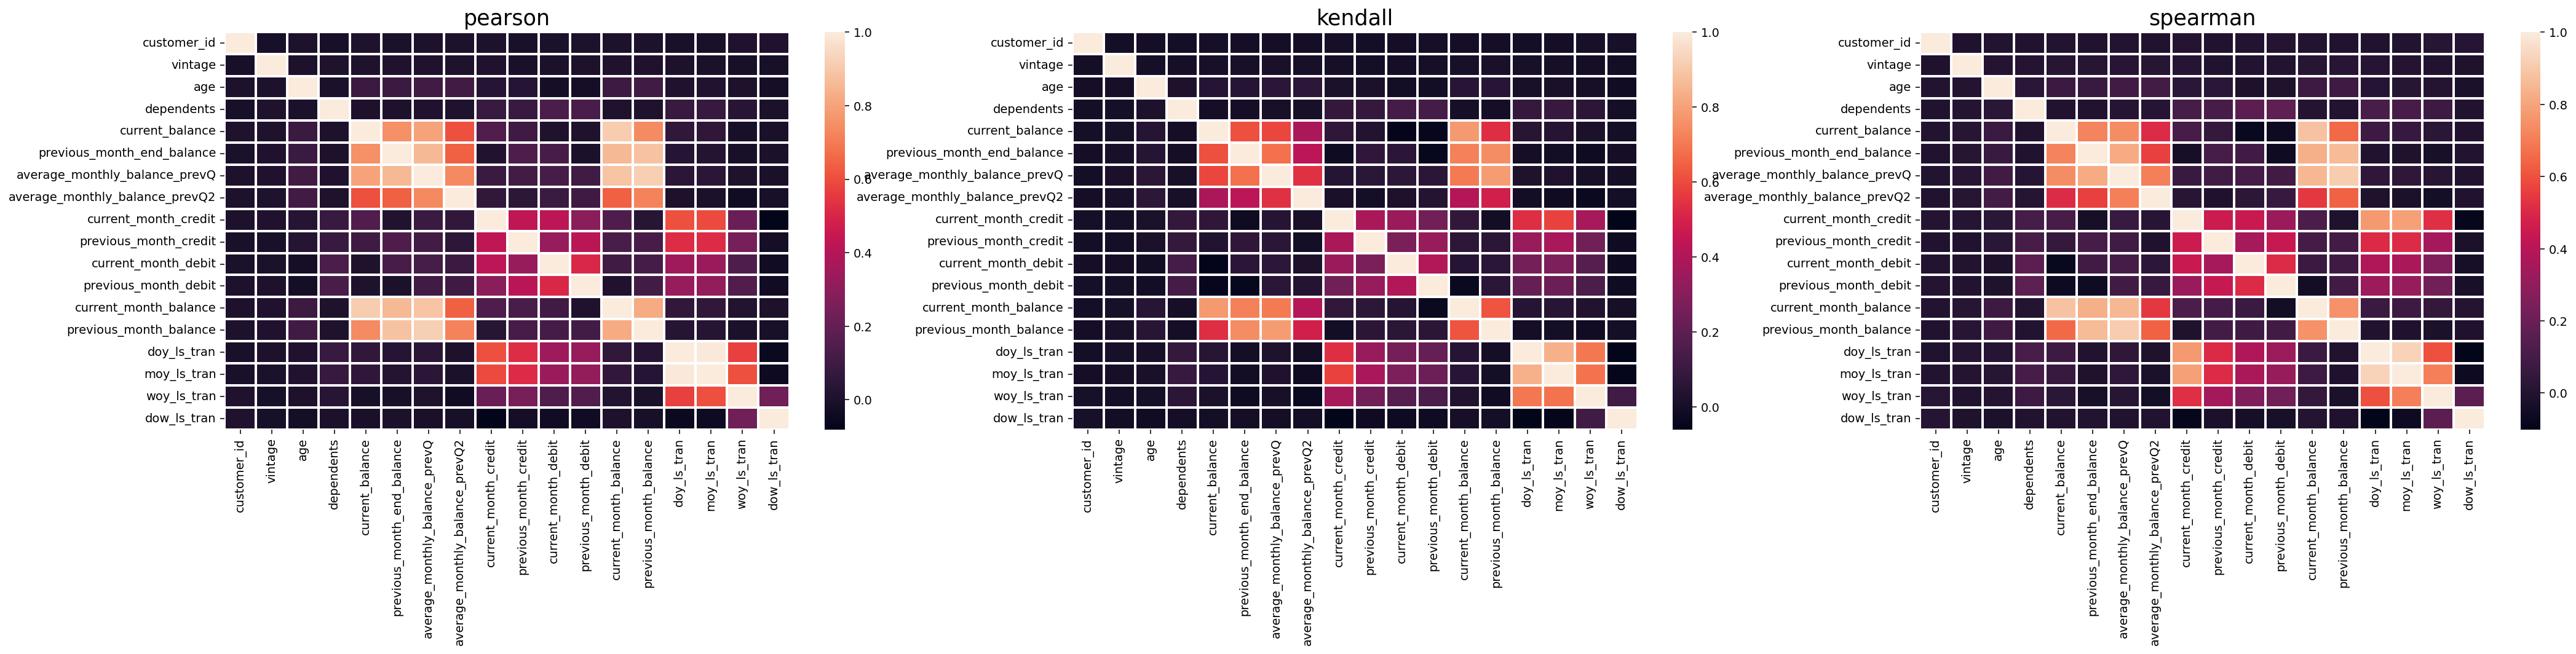

In [93]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

In [84]:
# extracting transaction information of current and previous months
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

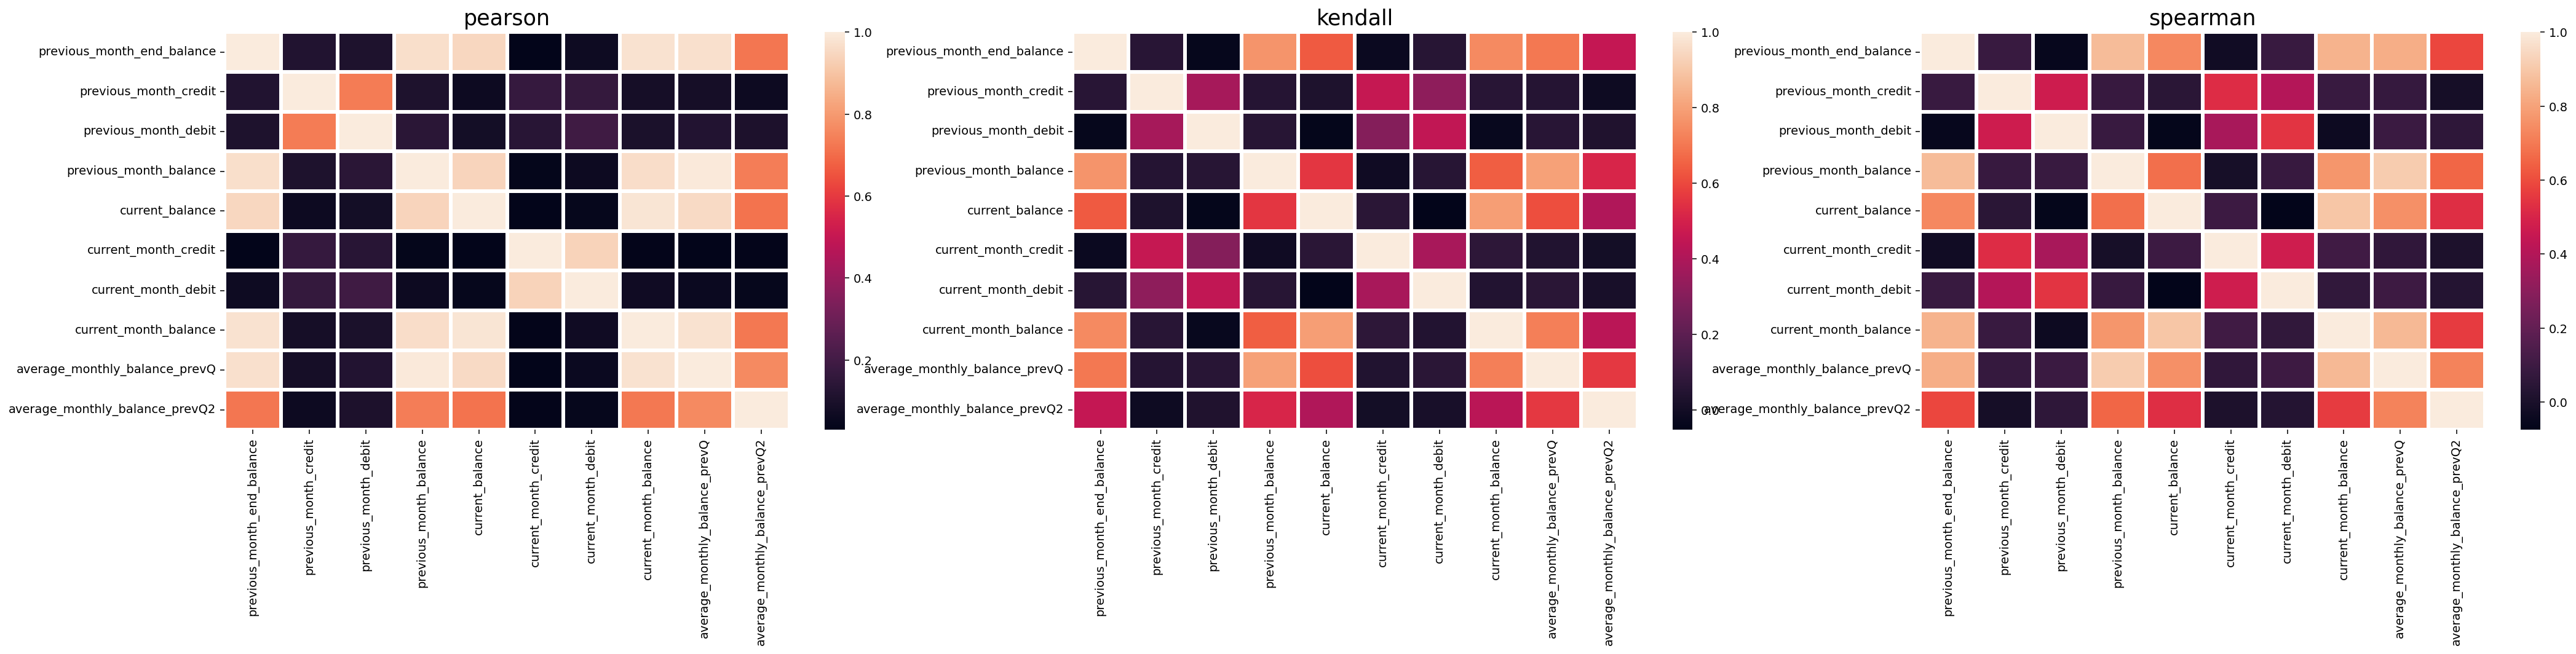

In [85]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 3)
  plt.title(i, fontsize=18)

### Scatter Plots

In [86]:
# Grouping variables
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

In [87]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 896x672 with 0 Axes>

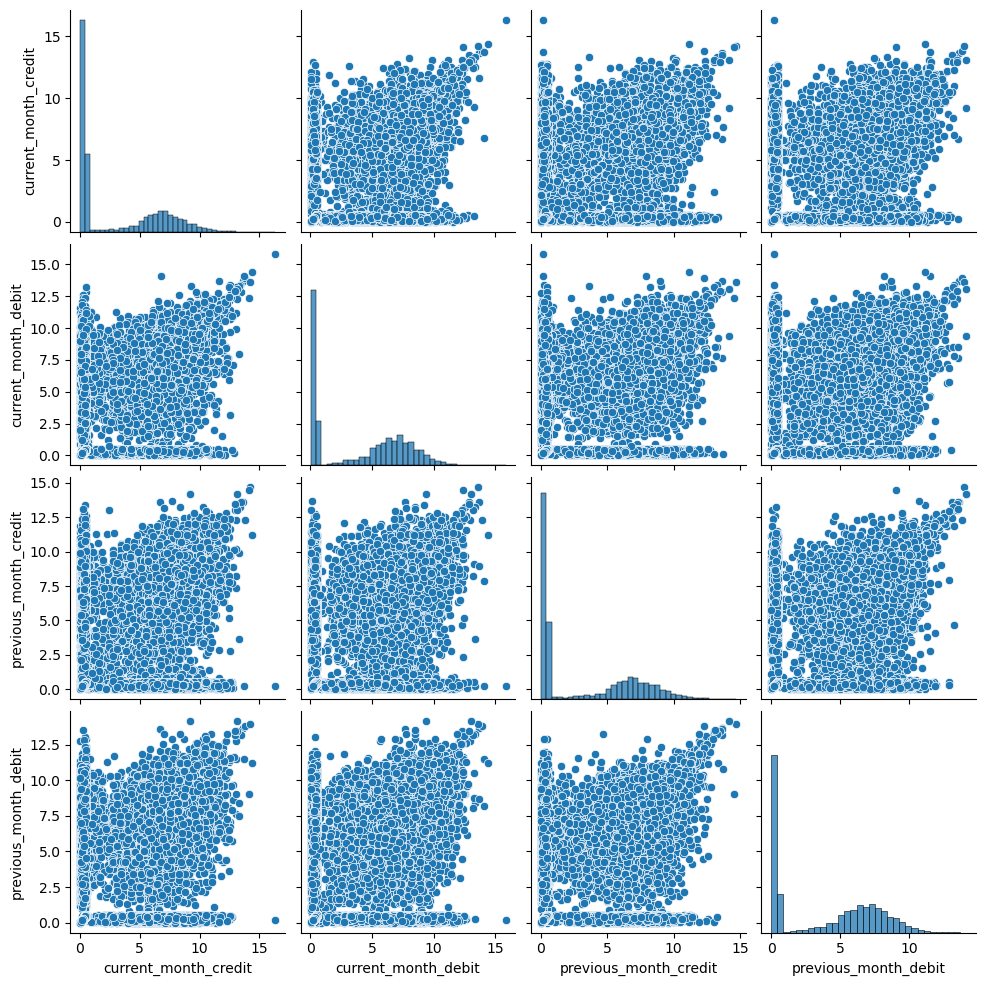

In [88]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

<Figure size 896x672 with 0 Axes>

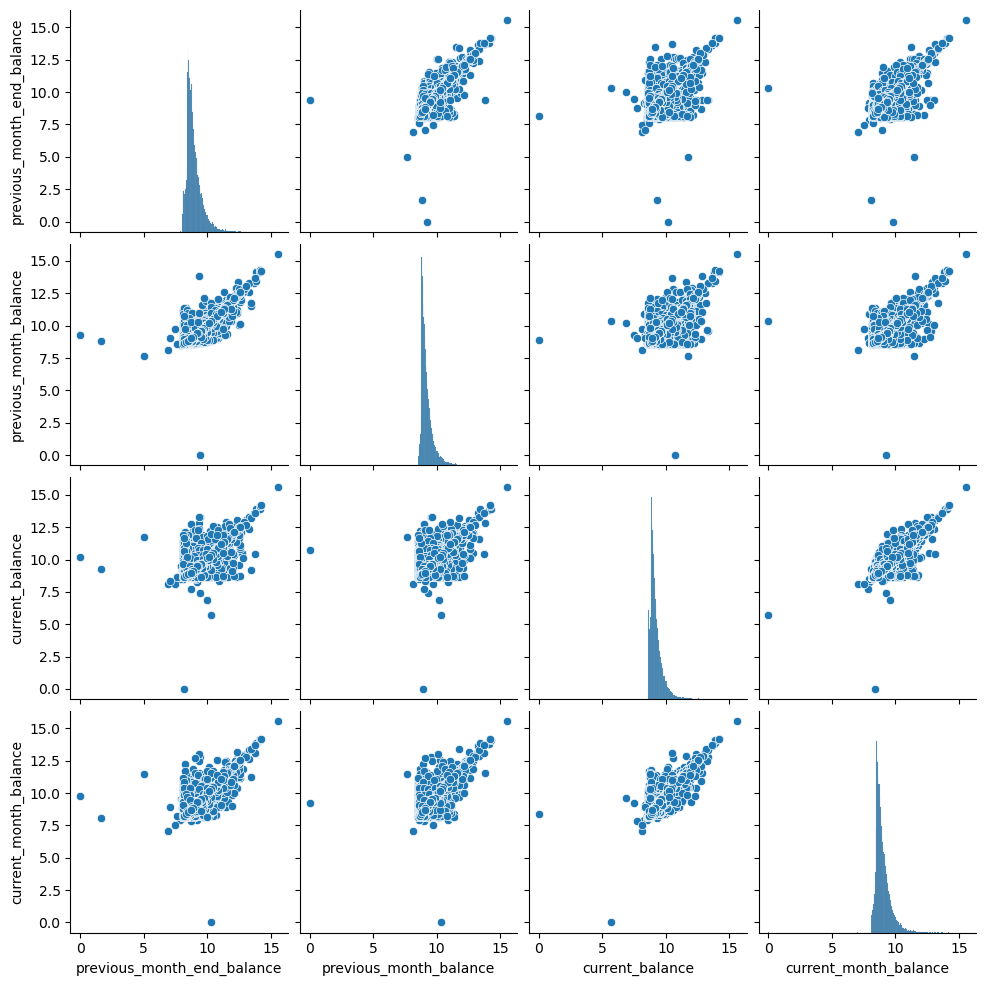

In [89]:
# balance variables
plt.figure(dpi=140)
sns.pairplot(numerical[balance])

<Axes: xlabel='average_monthly_balance_prevQ', ylabel='average_monthly_balance_prevQ2'>

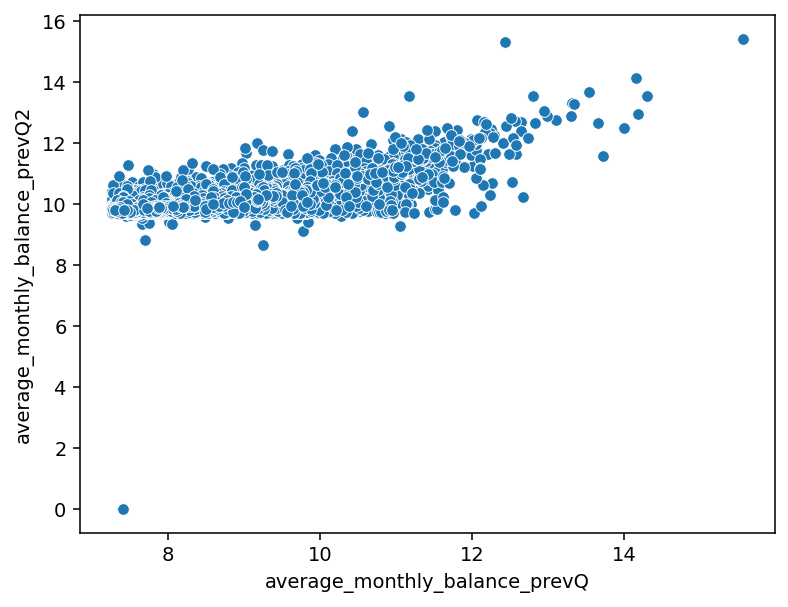

In [90]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(x= numerical['average_monthly_balance_prevQ'], y= numerical['average_monthly_balance_prevQ2'], s=5)